In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
pd.set_option('display.max_rows', 22)
pd.set_option("display.max_columns", 35)
voice_data=pd.read_csv("C:\\Users\\Eric Gao\\Downloads\\datasets\\voice.csv")

In [2]:
voice_data.head(1)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.0,0.0,male


In [3]:
voice_data.isnull().values.any()

False

In [4]:
voice_data.shape

(3168, 21)

C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1080x576 with 0 Axes>

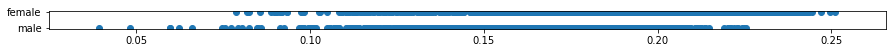

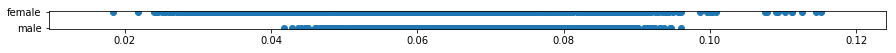

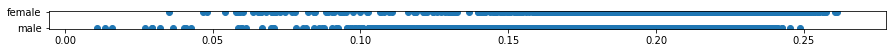

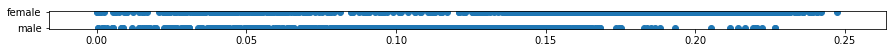

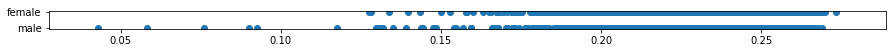

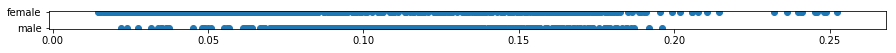

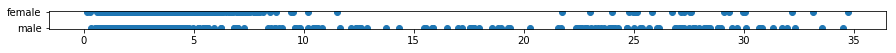

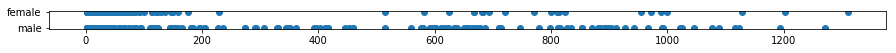

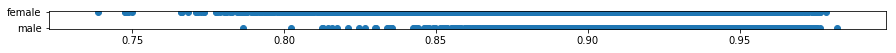

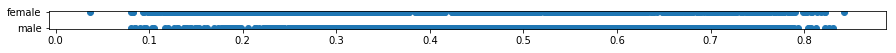

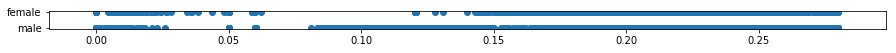

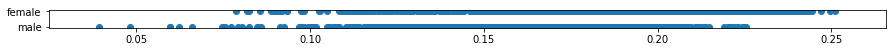

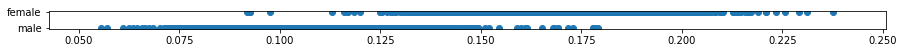

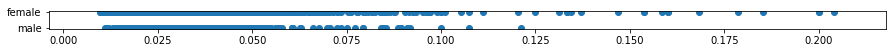

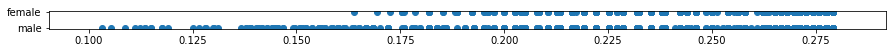

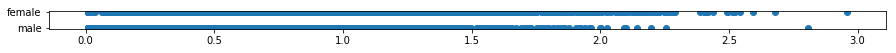

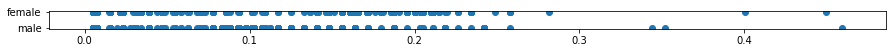

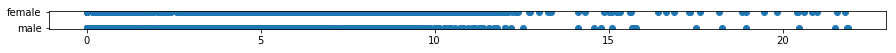

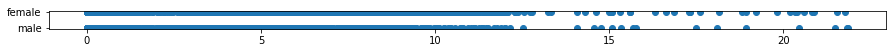

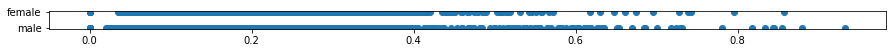

<Figure size 1080x576 with 0 Axes>

In [5]:
#Data visualization
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 1)
plt.scatter(voice_data.meanfreq, voice_data.label, label="Gender vs Mean Frequency")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 2)
plt.scatter(voice_data.sd, voice_data.label, label="Gender vs SD")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 3)
plt.scatter(voice_data["median"], voice_data.label, label="Gender vs Median")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 4)
plt.scatter(voice_data.Q25, voice_data.label, label="Gender vs 25th Percentile")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 5)
plt.scatter(voice_data.Q75, voice_data.label, label="Gender vs 75th Percentile")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 6)
plt.scatter(voice_data["IQR"], voice_data.label, label="Gender vs IQR")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 7)
plt.scatter(voice_data["skew"], voice_data.label, label="Gender vs Skew")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 8)
plt.scatter(voice_data["kurt"], voice_data.label, label="Gender vs Kurtosis")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 9)
plt.scatter(voice_data["sp.ent"], voice_data.label, label="Gender vs Spectral Entropy")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 10)
plt.scatter(voice_data.sfm, voice_data.label, label="Gender vs Spectral Flatness")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 11)
plt.scatter(voice_data['mode'], voice_data.label, label="Gender vs Mode")
plt.figure(figsize=(15,8))
plt.subplot(voice_data.shape[1], 1, 12)
plt.scatter(voice_data["centroid"], voice_data.label, label="Gender vs Frequency Centroid")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 13)
plt.scatter(voice_data.meanfun, voice_data.label, label="Gender vs Average fundamental frequency measured across acoustic signal")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 14)
plt.scatter(voice_data.minfun, voice_data.label, label="Gender vs Min fundamental frequency measured across acoustic signal")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 15)
plt.scatter(voice_data.maxfun, voice_data.label, label="Gender vs Max fundamental frequency measured across acoustic signal")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 16)
plt.scatter(voice_data.meandom, voice_data.label, label="Gender vs Average dominant frequency measured across acoustic signal")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 17)
plt.scatter(voice_data.mindom, voice_data.label, label="Gender vs Min dominant frequency measured across acoustic signal")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 18)
plt.scatter(voice_data.maxdom, voice_data.label, label="Gender vs Max dominant frequency measured across acoustic signal")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 19)
plt.scatter(voice_data["dfrange"], voice_data.label, label="Gender vs Range of dominant frequency measured across acoustic signal")
plt.figure(figsize=(15,8))
plt.subplot(20, 1, 20)
plt.scatter(voice_data["modindx"], voice_data.label, label="Gender vs Modulation index")
plt.figure(figsize=(15,8))
#Logistic Regression

In [6]:
#Checking to see which classifier model to use
#Use classifier models to predict
#Principal Component Analysis
#Feature tuning
#Logistic Regression using all parameters
model=LogisticRegression(random_state=1)
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predict=model.predict(X_test)
print("Predicted labels: ")
print(predict)
print("Accuracy of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model, X_train, y_train, cv=5)))

0.919558359621451
Predicted labels: 
['female' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'male

C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

In [7]:
#Decision Tree
model1=DecisionTreeClassifier(max_depth=7580, min_samples_leaf=4)
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model1.fit(X_train, y_train)
predict=model1.predict(X_test)
print("Predicted labels: ")
print(predict)
print("Accuracy of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

Predicted labels: 
['male' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 

In [24]:
#Random Forest
model2=RandomForestClassifier(n_estimators=25, max_depth=20)
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model2.fit(X_train, y_train)
predict=model2.predict(X_test)
print("Predicted values: ")
print(predict)
print("Accuracy of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model2, X_train, y_train, cv=5)))
print(model2.n_estimators)

Predicted values: 
['male' 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 

In [9]:
#Support Vector Machine
model3=SVC(C=4)
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model3.fit(X_train, y_train)
predict=model3.predict(X_test)
print("Predicted label: ")
print(predict)
print("Accuracy of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model3, X_train, y_train, cv=5)))

C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Predicted label: 
['male' 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'ma

C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eric Gao\Documents\Python Scripts\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Eric Gao\Documen

Cross Validation score:  0.7861098767453283


In [10]:
#Bayes Classifier
model4=GaussianNB()
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model4.fit(X_train, y_train)
predict_voice=model4.predict(X_test)
print("Predicted label: ")
print(predict_voice)
print("Accuray of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model4, X_train, y_train, cv=5)))

Predicted label: 
['male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 

In [11]:
#Gradient Booster
#Bayes Classifier
model5=GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, min_samples_leaf=4)
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model5.fit(X_train, y_train)
predict_voice=model5.predict(X_test)
print("Predicted label: ")
print(predict_voice)
print("Accuray of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model5, X_train, y_train, cv=5)))

Predicted label: 
['male' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'm

In [12]:
model6=KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm="auto", leaf_size=40)
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model6.fit(X_train, y_train)
predict_voice=model6.predict(X_test)
print("Predicted label: ")
print(predict_voice)
print("Accuray of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model6, X_train, y_train, cv=5)))

Predicted label: 
['male' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male

In [13]:
model7=XGBClassifier()
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model7.fit(X_train, y_train)
predict_voice=model7.predict(X_test)
print("Predicted label: ")
print(predict_voice)
print("Accuracy of the model: ",accuracy_score(predict, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(model7, X_train, y_train, cv=5)))

Predicted label: 
['male' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'f

In [14]:
#PCA with RandomForestClassifier
x=voice_data.drop("label", 1)
y=voice_data["label"]
random_features=random.randint(1,21)
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model_pca=PCA(n_components=17, random_state=1)
new_train=model_pca.fit_transform(X_train)
new_test=model_pca.fit_transform(X_test)
new_model=RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=100)
new_model.fit(new_train, y_train)
predicted_val=new_model.predict(new_test)
print(predicted_val)
print("Accuracy of the model: ",accuracy_score(predicted_val, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(new_model, new_train, y_train, cv=5)))
print(model_pca.n_components)

['female' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 

In [15]:
#Using PCA on XGBOOST
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model_pca=PCA(n_components=17, random_state=1)
new_train=model_pca.fit_transform(X_train)
new_test=model_pca.fit_transform(X_test)
new_model=XGBClassifier()
new_model.fit(new_train, y_train)
predicted_val=new_model.predict(new_test)
print(predicted_val)
print("Accuracy of the model: ",accuracy_score(predicted_val, y_test))
print("Cross Validation score: ", np.mean(cross_val_score(new_model, new_train, y_train, cv=5)))
print(model_pca.n_components)

['female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'female' '

In [92]:
#Variance Threshold to feature select
#Using on Random Forest Classifer
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=(0.8*(1-0.8)))
x=voice_data.drop("label", 1)
y=voice_data["label"]
new_model=sel.fit_transform(x,y)
new_model.shape
new_df=pd.DataFrame(new_model)
new_df["label"]=y
new_df
x=new_df.drop("label", 1)
y=new_df["label"]
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2)
model_variance=RandomForestClassifier(n_estimators=25, max_depth=20)
model_variance.fit(X_train, y_train)
predict=model_variance.predict(X_test)
print("Predicted labels using Variance Threshold: ")
print(predict)
print("Accuracy score:", accuracy_score(predict, y_test))
print("Cross validation score:", np.mean(cross_val_score(model_variance, X_train, y_train, cv=5)))

Predicted labels using Variance Threshold: 
['female' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'mal

In [65]:
#Random forest-feature selection with Select KBest(choosing 2)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_new = SelectKBest(chi2, k=2).fit_transform(x, y)
X_new.shape
new_data=pd.DataFrame(X_new)
new_data["label"]=y
print(new_data)
X=new_data.drop("label", 1)
y=new_data["label"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
model2=RandomForestClassifier(n_estimators=25, max_depth=20)
model2.fit(X_train, y_train)
predict=model2.predict(X_test)
print("Predicted labels with 2 features: ")
print(predict)
print("Accuracy score: ")
print(accuracy_score(predict, y_test))
print("Cross validation score: ")
print(np.mean(cross_val_score(model2, X_train, y_train, cv=5)))

               0         1   label
0     274.402906  0.007812    male
1     634.613855  0.054688    male
...          ...       ...     ...
3166    5.388298  3.593750  female
3167    5.769115  0.554688  female

[3168 rows x 3 columns]
Predicted labels with 2 features: 
['male' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'ma

In [66]:
#Random forest-feature selection(choosing 5)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_new = SelectKBest(chi2, k=5).fit_transform(x, y)
X_new.shape
new_data=pd.DataFrame(X_new)
new_data["label"]=y
print(new_data)
X=new_data.drop("label", 1)
y=new_data["label"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
model2=RandomForestClassifier(n_estimators=25, max_depth=20)
model2.fit(X_train, y_train)
predict=model2.predict(X_test)
print("Predicted labels with 2 features: ")
print(predict)
print("Accuracy score: ")
print(accuracy_score(predict, y_test))
print("Cross validation score: ")
print(np.mean(cross_val_score(model2, X_train, y_train, cv=5)))

               0         1         2         3         4   label
0     274.402906  0.491918  0.007812  0.007812  0.000000    male
1     634.613855  0.513724  0.009014  0.054688  0.046875    male
...          ...       ...       ...       ...       ...     ...
3166    5.388298  0.675470  0.791360  3.593750  3.585938  female
3167    5.769115  0.601529  0.227022  0.554688  0.546875  female

[3168 rows x 6 columns]
Predicted labels with 2 features: 
['female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'm

In [67]:
#Random forest-feature selection(choosing 10)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_new = SelectKBest(chi2, k=10).fit_transform(x, y)
X_new.shape
new_data=pd.DataFrame(X_new)
new_data["label"]=y
print(new_data)
X=new_data.drop("label", 1)
y=new_data["label"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
model2=RandomForestClassifier(n_estimators=25, max_depth=20)
model2.fit(X_train, y_train)
predict=model2.predict(X_test)
print("Predicted labels with 2 features: ")
print(predict)
print("Accuracy score: ")
print(accuracy_score(predict, y_test))
print("Cross validation score: ")
print(np.mean(cross_val_score(model2, X_train, y_train, cv=5)))

             0         1          2           3         4         5         6  \
0     0.015071  0.075122  12.863462  274.402906  0.491918  0.084279  0.007812   
1     0.019414  0.073252  22.423285  634.613855  0.513724  0.107937  0.009014   
...        ...       ...        ...         ...       ...       ...       ...   
3166  0.043508  0.176435   1.591065    5.388298  0.675470  0.172375  0.791360   
3167  0.070072  0.180756   1.705029    5.769115  0.601529  0.185607  0.227022   

             7         8         9   label  
0     0.007812  0.007812  0.000000    male  
1     0.007812  0.054688  0.046875    male  
...        ...       ...       ...     ...  
3166  0.007812  3.593750  3.585938  female  
3167  0.007812  0.554688  0.546875  female  

[3168 rows x 11 columns]
Predicted labels with 2 features: 
['male' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'fema

In [69]:
#Random forest-feature selection(choosing 15)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_new = SelectKBest(chi2, k=15).fit_transform(x, y)
X_new.shape
new_data=pd.DataFrame(X_new)
new_data["label"]=y
print(new_data)
X=new_data.drop("label", 1)
y=new_data["label"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
model2=RandomForestClassifier(n_estimators=25, max_depth=20)
model2.fit(X_train, y_train)
predict=model2.predict(X_test)
print("Predicted labels with 2 features: ")
print(predict)
print("Accuracy score: ")
print(accuracy_score(predict, y_test))
print("Cross validation score: ")
print(np.mean(cross_val_score(model2, X_train, y_train, cv=5)))

             0         1         2         3         4          5           6  \
0     0.059781  0.064241  0.032027  0.015071  0.075122  12.863462  274.402906   
1     0.066009  0.067310  0.040229  0.019414  0.073252  22.423285  634.613855   
...        ...       ...       ...       ...       ...        ...         ...   
3166  0.143659  0.090628  0.184976  0.043508  0.176435   1.591065    5.388298   
3167  0.165509  0.092884  0.183044  0.070072  0.180756   1.705029    5.769115   

             7         8         9        10        11        12        13  \
0     0.491918  0.000000  0.059781  0.084279  0.007812  0.007812  0.007812   
1     0.513724  0.000000  0.066009  0.107937  0.009014  0.007812  0.054688   
...        ...       ...       ...       ...       ...       ...       ...   
3166  0.675470  0.212202  0.143659  0.172375  0.791360  0.007812  3.593750   
3167  0.601529  0.267702  0.165509  0.185607  0.227022  0.007812  0.554688   

            14   label  
0     0.000000    m

In [71]:
#Random forest-feature selection(choosing all)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=voice_data.drop("label", 1)
y=voice_data["label"]
X_new = SelectKBest(chi2, k="all").fit_transform(x, y)
X_new.shape
new_data=pd.DataFrame(X_new)
new_data["label"]=y
print(new_data)
X=new_data.drop("label", 1)
y=new_data["label"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
model2=RandomForestClassifier(n_estimators=25, max_depth=20)
model2.fit(X_train, y_train)
predict=model2.predict(X_test)
print("Predicted labels with 2 features: ")
print(predict)
print("Accuracy score: ")
print(accuracy_score(predict, y_test))
print("Cross validation score: ")
print(np.mean(cross_val_score(model2, X_train, y_train, cv=5)))
#Using all attributes gives the highest accuracy score

             0         1         2         3         4         5          6  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
...        ...       ...       ...       ...       ...       ...        ...   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

               7         8         9        10        11        12        13  \
0     274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1     634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
...          ...       ...       ...       ...       ...       ...       ...   
3166    5.388298  0.950436  0.675470  0.212202  0.143659  0.172375  0.034483   
3167    5.769115  0.938829  0.601529  0.267702  0.165509  0.185607  0.062257   

            14        15        16        17

In [142]:
new_data=pd.get_dummies(voice_data.label)
new_voice=pd.concat([voice_data, new_data], axis=1)
new_voice.drop("label", 1, inplace=True)
new_voice
extract=new_voice.corr()
#only take corr greater than abs(0.3)
corrs=extract[extract>=abs(0.3)]
corrs
#Features used-meanfreq, sd, Q25, IQR, sp.ent, sfm, centroid, meanfun

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,female,male
meanfreq,1.000000,NaN,0.925445,0.911416,0.740997,NaN,NaN,NaN,NaN,NaN,0.687715,1.000000,0.460844,0.383937,NaN,0.536666,NaN,0.519528,0.515570,NaN,0.337415,NaN
sd,NaN,1.000000,NaN,NaN,NaN,0.874660,0.314597,0.346241,0.716620,0.838086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479539
median,0.925445,NaN,1.000000,0.774922,0.731849,NaN,NaN,NaN,NaN,NaN,0.677433,0.925445,0.414909,0.337602,NaN,0.455943,NaN,0.438919,0.435621,NaN,NaN,NaN
Q25,0.911416,NaN,0.774922,1.000000,0.477140,NaN,NaN,NaN,NaN,NaN,0.591277,0.911416,0.545035,0.320994,NaN,0.467403,0.302255,0.459683,0.454394,NaN,0.511455,NaN
Q75,0.740997,NaN,0.731849,0.477140,1.000000,NaN,NaN,NaN,NaN,NaN,0.486857,0.740997,NaN,NaN,NaN,0.359181,NaN,0.335114,0.335648,NaN,NaN,NaN
IQR,NaN,0.874660,NaN,NaN,NaN,1.000000,NaN,0.316185,0.640813,0.663601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.618916
skew,NaN,0.314597,NaN,NaN,NaN,NaN,1.000000,0.977020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kurt,NaN,0.346241,NaN,NaN,NaN,0.316185,0.977020,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp.ent,NaN,0.716620,NaN,NaN,NaN,0.640813,NaN,NaN,1.000000,0.866411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490552
sfm,NaN,0.838086,NaN,NaN,NaN,0.663601,NaN,NaN,0.866411,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357499


In [176]:
#Selecting features whose correlation with the label feature is at least abs(0.3)(r=+=-0.3)
#Features used-meanfreq, sd, Q25, IQR, sp.ent, sfm, centroid, meanfun
#Testing on Decision Tree Classifier, Random Forest Classifier
#x=voice_data["meanfreq", "sd", "Q25", "IQR", "sp.ent", "sfm", "centroid", "meanfun"]
extracted_data=pd.DataFrame(voice_data[["meanfreq", "sd", "Q25", "IQR", "sp.ent", "sfm", "centroid", "meanfun"]])
extracted_data["label"]=voice_data.label
extracted_data.head(1)
#Using 8 Features

,meanfreq,sd,Q25,IQR,sp.ent,sfm,centroid,meanfun,label
0,0.059781,0.064241,0.015071,0.075122,0.893369,0.491918,0.059781,0.084279,male


In [183]:
#Decision Tree Classifier
x=extracted_data.drop("label", 1)
y=extracted_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model1=DecisionTreeClassifier(max_depth=7580, min_samples_leaf=4)
model1.fit(X_train, y_train)
predict=model1.predict(X_test)
print("Predicted labels using Features as Determined by Correlation for Decision Tree Classifier: ")
print(predict)
print("Accuracy score:", accuracy_score(predict, y_test))
print("Cross validation score:", np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

Predicted labels using Features as Determined by Correlation for Decision Tree Classifier: 
['male' 'female' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'female' 'female' 

In [182]:
#Random Forest Classifier
x=extracted_data.drop("label", 1)
y=extracted_data["label"]
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
model2=RandomForestClassifier(n_estimators=25, max_depth=20)
model2.fit(X_train, y_train)
predict=model2.predict(X_test)
print("Predicted labels using Features as Determined by Correlation for Random Forest Classifier: ")
print(predict)
print("Accuracy score:", accuracy_score(predict, y_test))
print("Cross validation score:", np.mean(cross_val_score(model2, X_train, y_train, cv=5)))

Predicted labels using Features as Determined by Correlation for Random Forest Classifier: 
['female' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'ma